In [1]:
import matplotlib.finance as mpf

C:\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [ ]:
def candlechart(ohlc, width=0.8):
    """入力されたデータフレームに対してローソク足チャートを返す
        引数:
            * ohlc:
                *データフレーム
                * 列名に'open'", 'close', 'low', 'high'を入れること
                * 順不同"
            * widrh: ローソクの線幅
        戻り値: ax: subplot"""
    fig, ax = plt.subplots()
    # ローソク足
    fin.candlestick2_ohlc(ax, opens=ohlc.open.values, closes=ohlc.close.values,
                          lows=ohlc.low.values, highs=ohlc.high.values,
                          width=width, colorup='r', colordown='b')

    # x軸を時間にする
    xdate = ohlc.index
    ax.xaxis.set_major_locator(ticker.MaxNLocator(6))

    def mydate(x, pos):
        try:
            return xdate[int(x)]
        except IndexError:
            return ''

    # ax.xaxis.set_major_formatter(ticker.FuncFormatter(mydate))
    ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

    fig.autofmt_xdate()
    fig.tight_layout()

    return fig, ax


In [6]:
from randomwalk import *

In [27]:
df = randomwalk(60*24*30, freq='T', tick=0.01).resample('B').ohlc() + 115
df.head()

,open,high,low,close
2017-03-14,115.01,115.72,115.01,115.52
2017-03-15,115.53,115.62,114.79,114.99
2017-03-16,115.00,115.69,114.97,115.48
2017-03-17,115.49,115.86,114.99,115.15
2017-03-20,115.16,115.22,114.74,114.75


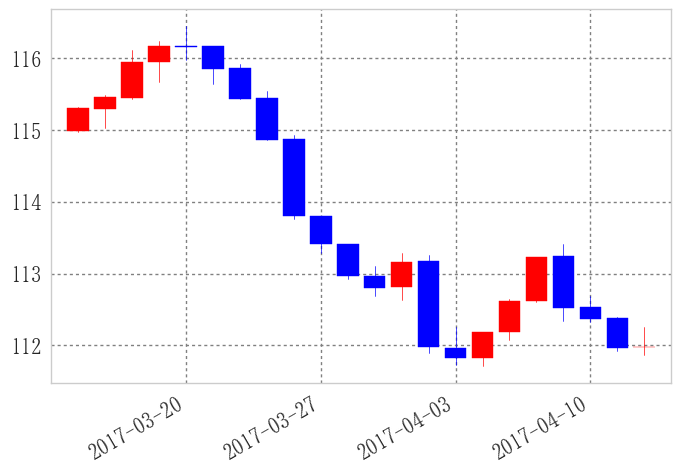

In [18]:
# 参考: http://qiita.com/toyolab/items/1b5d11b5d376bd542022

fig = plt.figure()
ax = plt.subplot()

ohlc = np.vstack((range(len(df)), df.values.T)).T #x軸データを整数に
mpf.candlestick_ohlc(ax, ohlc, width=0.8, colorup='r', colordown='b')

xtick0 = (5-df.index[0].weekday())%5 #最初の月曜日のインデックス

plt.xticks(range(xtick0,len(df),5), [x.strftime('%Y-%m-%d') for x in df.index][xtick0::5])
ax.grid(True) #グリッド表示
ax.set_xlim(-1, len(df)) #x軸の範囲
fig.autofmt_xdate() #x軸のオートフォーマット

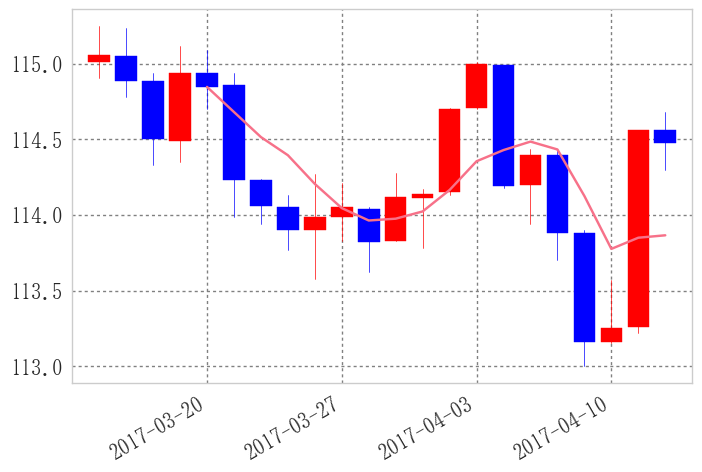

In [7]:
# 参考: http://qiita.com/toyolab/items/1b5d11b5d376bd542022
import matplotlib.pyplot as plt
import matplotlib.finance as mpf
from randomwalk import *


df = randomwalk(60 * 24 * 30, freq='T', tick=0.01).resample('B').ohlc() + 115

fig = plt.figure()
ax = plt.subplot()

# candle
ohlc = np.vstack((range(len(df)), df.values.T)).T  # x軸データを整数に
mpf.candlestick_ohlc(ax, ohlc, width=0.8, colorup='r', colordown='b')

# sma
sma = df.close.rolling(5).mean()
vstack = np.vstack((range(len(sma)), sma.values.T)).T  # x軸データを整数に
ax.plot(vstack[:, 0], vstack[:, 1])

# xticks
xtick0 = (5 - df.index[0].weekday()) % 5  # 最初の月曜日のインデックス
plt.xticks(range(xtick0, len(df), 5), [x.strftime('%Y-%m-%d') for x in df.index][xtick0::5])
ax.grid(True)  # グリッド表示
ax.set_xlim(-1, len(df))  # x軸の範囲
fig.autofmt_xdate()  # x軸のオートフォーマット
plt.show()


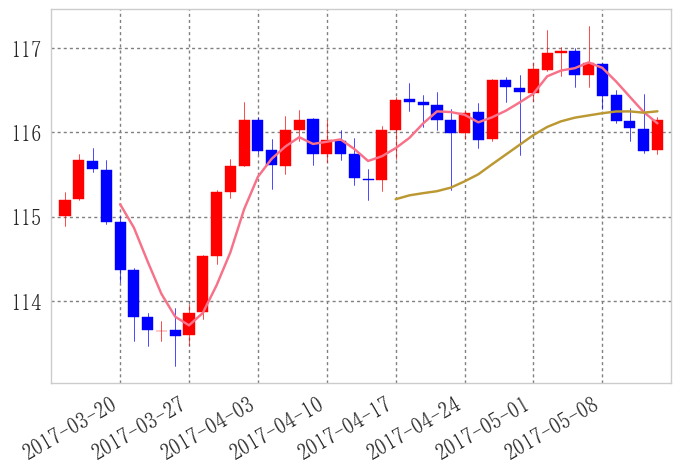

In [17]:
# 参考: http://qiita.com/toyolab/items/1b5d11b5d376bd542022
import matplotlib.pyplot as plt
import matplotlib.finance as mpf
from randomwalk import *


def sma(ohlc, period):
    sma = ohlc.close.rolling(period).mean()
    vstack = np.vstack((range(len(sma)), sma.values.T)).T  # x軸データを整数に
    return vstack


df = randomwalk(60 * 24 * 60, freq='T', tick=0.01).resample('B').ohlc() + 115

fig = plt.figure()
ax = plt.subplot()

# candle
ohlc = np.vstack((range(len(df)), df.values.T)).T  # x軸データを整数に
mpf.candlestick_ohlc(ax, ohlc, width=0.8, colorup='r', colordown='b')

# sma
sma5 = sma(df, 5)
sma25 = sma(df, 25)
ax.plot(sma5[:, 0], sma5[:, 1])
ax.plot(sma25[:, 0], sma25[:, 1])


# xticks
xtick0 = (5 - df.index[0].weekday()) % 5  # 最初の月曜日のインデックス
plt.xticks(range(xtick0, len(df), 5), [x.strftime('%Y-%m-%d') for x in df.index][xtick0::5])
ax.grid(True)  # グリッド表示
ax.set_xlim(-1, len(df))  # x軸の範囲
fig.autofmt_xdate()  # x軸のオートフォーマット
plt.show()
